
## Dimensionality Reduction and Clustering

The MNIST data set is hand-drawn digits, from zero through nine.Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Source: https://www.kaggle.com/c/digit-recognizer/data

For this homework, perform the following with the MNIST data:

Use PCA to reduce the dimensionality

    a. How many components did you use? Why?

    b. Plot the first two components. Do you notice any trends? What is this plot showing us?

    c. Why would you use PCA? What is it doing? And what are the drawbacks?

    d. Plot some of the images, then compress them using PCA and plot again. How does it look?

Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

    a. How does this plot differ from your PCA plot?

    b. How robust is it to changes in perplexity?

    c. How robust is it to different learning rate and number of iterations?

Perform k-means clustering:

    a. How did you choose k?

    b. How did you evaluate your clustering?

    c. Visualize your clusters using t-sne

    d. Did you scale your data?

    e. How robust is your clustering?

Perform hierarchical clustering:

    a. Plot your dendrogram

    b. How many clusters seem reasonable based off your graph?

    c. How does your dendrogram change with different linkage methods?

### Grading
This homework is due March 22, 2018 by midnight Utah time. By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

### Rubric:

- Code Quality - 10%
- Storytelling - 10%
- PCA - 20%
- T-SNE - 20%
- K-means - 20%
- Hierarchical Clustering - 20%

In [35]:
from sklearn.datasets import fetch_mldata

In [36]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [38]:
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

## PCA

In [39]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

In [40]:
X_2dim.shape

(70000, 2)

In [41]:
pca.explained_variance_ratio_

array([ 0.09746116,  0.07155445])

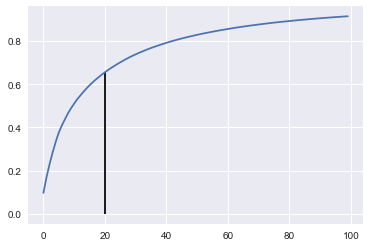

In [42]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)

a. How many components did you use? Why?

In [43]:
index_95 = np.argmax(cum_ratio >= 0.95)
print(index_95)
print(cum_ratio[index_95])

0
0.0974611592249


In [44]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 154)


b. Plot the first two components. Do you notice any trends? What is this plot showing us?

We can plot the two principal components against each other to see if we observe any clear trends.

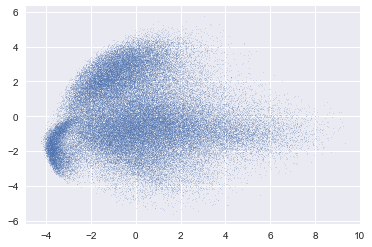

In [45]:
plt.scatter(X_pca[:,0],X_pca[:,1],s=.1,alpha=.55)

As we can see from the plot, there isn't a clear relationship between the two components.  This isn't too surprising since a strong relationship between our components would imply redundancy in our features.

c. Why would you use PCA? What is it doing? And what are the drawbacks?

d. Plot some of the images, then compress them using PCA and plot again. How does it look?

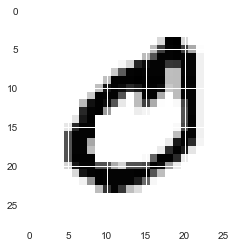

In [46]:
plt.imshow(X[1].reshape((28,28)), cmap='Greys')

In [47]:
mnist=mnist.data

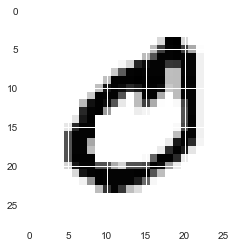

In [48]:
plt.imshow(mnist[1].reshape((28,28)), cmap='Greys')

## T-SNE

In [49]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
%matplotlib inline


mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

In [50]:
print(X.shape)

(70000, 784)


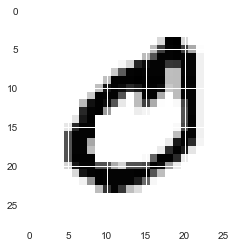

In [51]:
plt.imshow(X[1].reshape((28,28)), cmap='Greys')

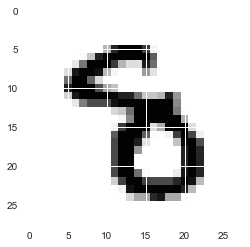

In [52]:
plt.imshow(X[50000].reshape((28,28)), cmap='Greys')

In [53]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.914936
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.213913
[t-SNE] Error after 275 iterations: 1.213913


In [54]:
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

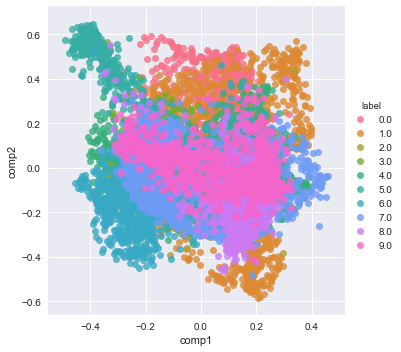

In [55]:
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

a. How does this plot differ from your PCA plot?

b. How robust is it to changes in perplexity?

In [56]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.347580
[t-SNE] KL divergence after 50 iterations with early exaggeration: 2.297199
[t-SNE] Error after 250 iterations: 2.297199


In [57]:
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

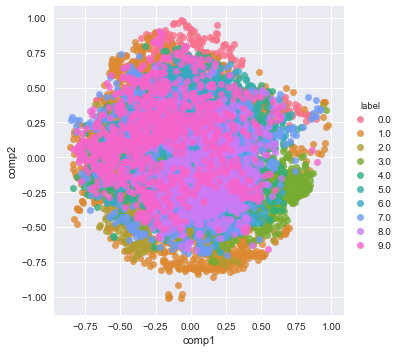

In [58]:
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

In [59]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.183470
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.848918
[t-SNE] Error after 75 iterations: 0.848918


In [60]:
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

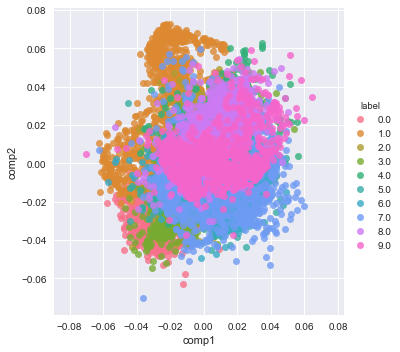

In [61]:
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

In [62]:
tsne = TSNE(n_components=2, verbose=1, perplexity=500, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.872651
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.300057
[t-SNE] Error after 75 iterations: 0.300057


In [63]:
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]

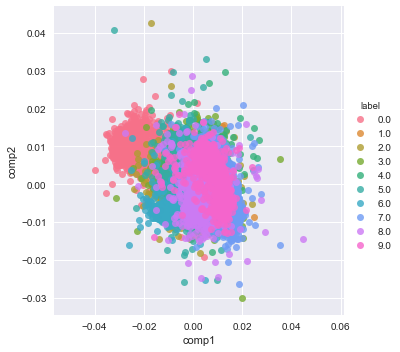

In [64]:
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

c. How robust is it to different learning rate and number of iterations?

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.914936
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.197660
[t-SNE] Error after 325 iterations: 1.197660


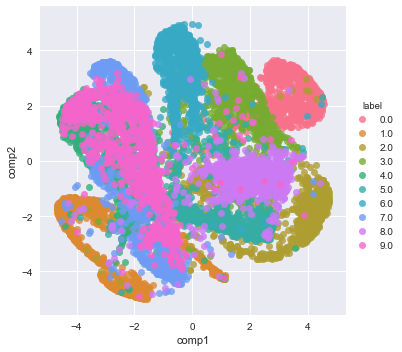

In [65]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=500)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.914936
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.213962
[t-SNE] Error after 75 iterations: 1.213962


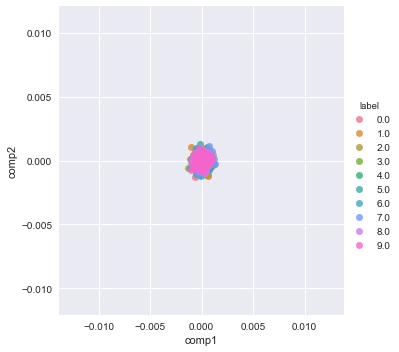

In [66]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.914936
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.213909
[t-SNE] Error after 275 iterations: 1.213909


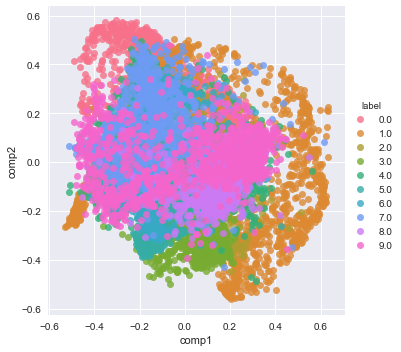

In [67]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.914936
[t-SNE] KL divergence after 50 iterations with early exaggeration: 1.213898
[t-SNE] Error after 200 iterations: 1.213898


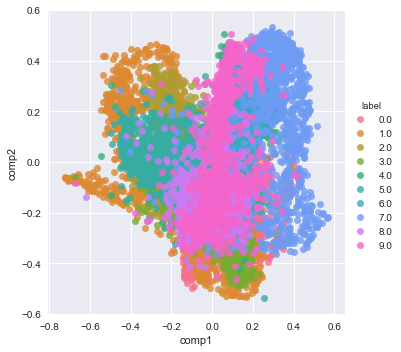

In [68]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=200, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=tsne, hue='label', fit_reg=False)